## Import, Load, Explore Data

In [1]:
from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.metrics import coverage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
from __future__ import division

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

import datetime

import string

%matplotlib inline

/Users/bcipollini/code/venv3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
SDG_dict = {1:"1: No Poverty", 
            2:"2: Zero Hunger",
            3:"3: Good Health and Well-being",
            4:"4: Quality Education",
            5:"5: Gender Equality",
            6:"6: Clean Water and Sanitation",
            7:"7: Affordable and Clean Energy",
            8:"8: Decent Work and Economic Growth",
            9:"9: Industry, Innovation, and Infrastructure",
            10:"10: Reduced Inequalities",
            11:"11: Sustainable Cities and Communities",
            12:"12: Responsible Consumption and Production",
            13:"13: Climate Action",
            14:"14: Life Below Water",
            15:"15: Life on Land",
            16:"16: Peace, Justice, and Strong Institutions",
            17:"17: Partnerships for the Goals"}

In [4]:
df_lab = pd.read_csv('manula_datakind_labels.csv')
df_lab = df_lab[['text', 'SDGs']]
for i in range(len(df_lab)):
    try: 
        df_lab['SDGs'][i] = df_lab['SDGs'][i].strip().split(", ")
    except:
        continue
        
df_lab = df_lab[df_lab['SDGs'].apply(type)==list]
df_lab.head()

,text,SDGs
0,Continue to work towards achieving gender equa...,[5]
1,"Ensure access to education, employment, health...","[8, 3, 4, 10]"
2,Enhance cooperation at the regional and intern...,"[1, 3, 2, 6]"
3,Continue the efforts undertaken by the Governm...,"[9, 16]"
4,"Improve equal access to the legal aid system, ...","[1, 10, 16]"


In [46]:
tfidf = TfidfVectorizer( max_df=.2, stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation),
                             tokenizer = word_tokenize)
X = tfidf.fit_transform(df_lab.text)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_lab.SDGs)


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


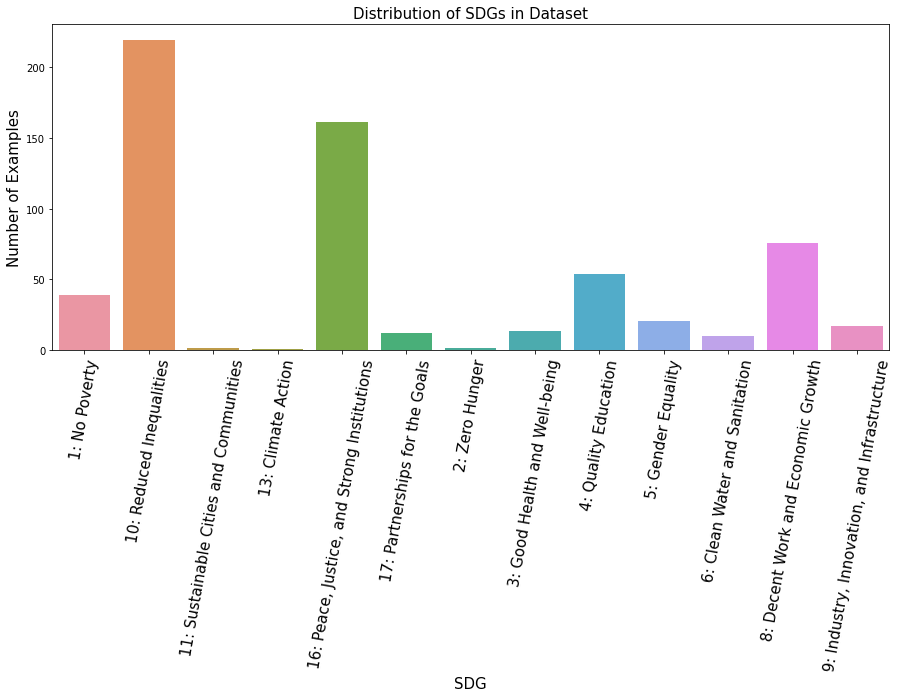

In [18]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=80, fontsize = 15)
plt.title('Distribution of SDGs in Dataset', fontsize = 15)
plt.ylabel('Number of Examples', fontsize = 15)
plt.xlabel('SDG', fontsize = 15)
sns.barplot([SDG_dict[int(i)] for i in list(mlb.classes_)], y_pred.sum(axis=0))

In [20]:
# label cardinality is average number of labels per training example
df_lab['SDGs'].apply(len).mean()

1.7994269340974212

## Classifier Performance

In [21]:
dt = DecisionTreeClassifier()
mnb = OneVsRestClassifier(MultinomialNB())
rf = RandomForestClassifier()
svm = OneVsRestClassifier(LinearSVC())
knn = KNeighborsClassifier()
nn = MLPClassifier(activation='relu', solver ='adam', random_state=42, 
                  hidden_layer_sizes=(175,), max_iter=200,)

classifiers = {'tree': dt, 'naive bayes' :mnb, 'forest': rf, 'svm': svm, 'knn': knn, 'nn': nn}

In [22]:
def get_scores(metric):
    scores = dict()
    for clf_name, clf in classifiers.items():
        start = time.time()
        score = cross_val_score(clf, X, y, scoring=metric, cv=7)
        end = time.time()
        print(clf_name + " took %f seconds" % (end-start))
        scores[clf_name] = score
    
    return pd.DataFrame(scores)

tree took 0.303951 seconds
naive bayes took 0.121999 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))


forest took 2.829331 seconds
svm took 0.132122 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))


knn took 0.170464 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

nn took 12.457239 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


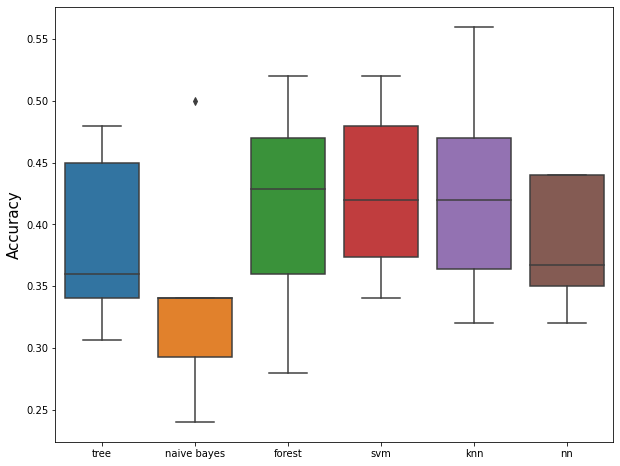

In [23]:
plt.figure(figsize=(10,8))
plt.ylabel('Accuracy', fontsize=15)
sns.boxplot(data=get_scores('accuracy'))

tree took 0.229229 seconds
naive bayes took 0.113477 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))


forest took 2.727854 seconds
svm took 0.142630 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))


knn took 0.168933 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

nn took 16.647000 seconds


/Users/bcipollini/code/venv3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


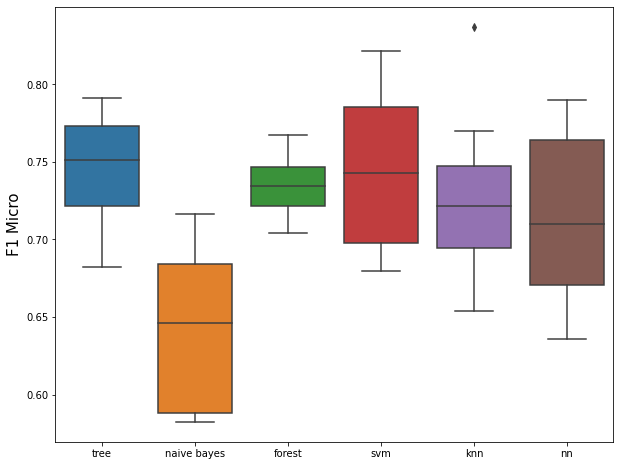

In [24]:
plt.figure(figsize=(10,8))
plt.ylabel('F1 Micro', fontsize=15)
sns.boxplot(data=get_scores('f1_micro'))

## Let's try to predict some text with our decision tree classifier

In [25]:
def predict_SDG(text, model):
    test = tfidf.transform([text])
    model.fit(X,y)
    preds = model.predict(test)
    SDGs= zip(preds[0], [SDG_dict[int(i)] for i in list(mlb.classes_)])
    return [desc for num, desc in SDGs if num == 1]
    

In [26]:
acore = "ACORE is a national non-profit organization dedicated to advancing the renewable energy sector through market development, policy changes, and financial innovation. With a savvy staff of experts, fifteen years of experience promoting renewable energy and hundreds of member companies, non-profits, and other organizations from across the spectrum of renewable energy technologies, consumers, and investors, ACORE is uniquely well-positioned to strategically promote the policies and financial structures essential to renewable energy growth. The organization’s annual conferences in Washington, D.C., New York and San Francisco set the industry standard in providing important venues for key leaders to meet, discuss recent developments, and hear the latest from senior government officials and seasoned experts. ACORE's membership spans all constituencies in the renewable energy sector, including developers, manufacturers, providers of smart grid technologies, financial institutions, corporate end-users, professional service providers, educators, and allied non-profit groups. ACORE accomplishes much of its work by convening leaders in each of these constituencies, publishing research and analysis, advocating for key policies with Federal and state legislators and agency officials, facilitating communications among our members, and media outreach."

In [27]:
predict_SDG(acore, dt)

['8: Decent Work and Economic Growth',
 '9: Industry, Innovation, and Infrastructure']

OK, the ACORE text came up as SDG 9 when we use the decision tree model:
<p>Not wrong, but not right

In [28]:
msfgoals = "Médecins Sans Frontières is a private, international association. The association is made up mainly of doctors and health sector workers and is also open to all other professions which might help in achieving its aims. All of its members agree to honour the following principles: Médecins Sans Frontières provides assistance to populations in distress, to victims of natural or man-made disasters and to victims of armed conflict. They do so irrespective of race, religion, creed or political convictions. Médecins Sans Frontières observes neutrality and impartiality in the name of universal medical ethics and the right to humanitarian assistance and claims full and unhindered freedom in the exercise of its functions. Members undertake to respect their professional code of ethics and maintain complete independence from all political, economic or religious powers. As volunteers, members understand the risks and dangers of the missions they carry out and make no claim for themselves or their assigns for any form of compensation other than that which the association might be able to afford them."

In [38]:
predict_SDG(msfgoals, svm)

['10: Reduced Inequalities']

MSFGOALS text came up as SDG 10 when we use the support vector machine:

<p>MSFGOALS is primarily about health and medicine, so this is not a very good match

## Evaluation

In [53]:
# 80/20 train test split
train_split = int(X.shape[0]*.8)
dt.fit(X[:train_split],y[:train_split])
y_pred = dt.predict(X[(train_split+1):])
y_true = y[(train_split+1):]

print(y_true.shape)
print(y_pred.shape)

(69, 13)
(69, 13)


In [55]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(y_true, y_pred)

0.6130930261365044

In [57]:
true_predicted_diff = (y_true.sum(axis=0) - y_pred.sum(axis=0))
true_predicted_diff_norm = true_predicted_diff / y_true.sum(axis=0)

/Users/bcipollini/code/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Aggregate difference between true and predicted labels. Score of 0 indicates that there are either no wrong predictions or the false positives and false negatives cancel out.


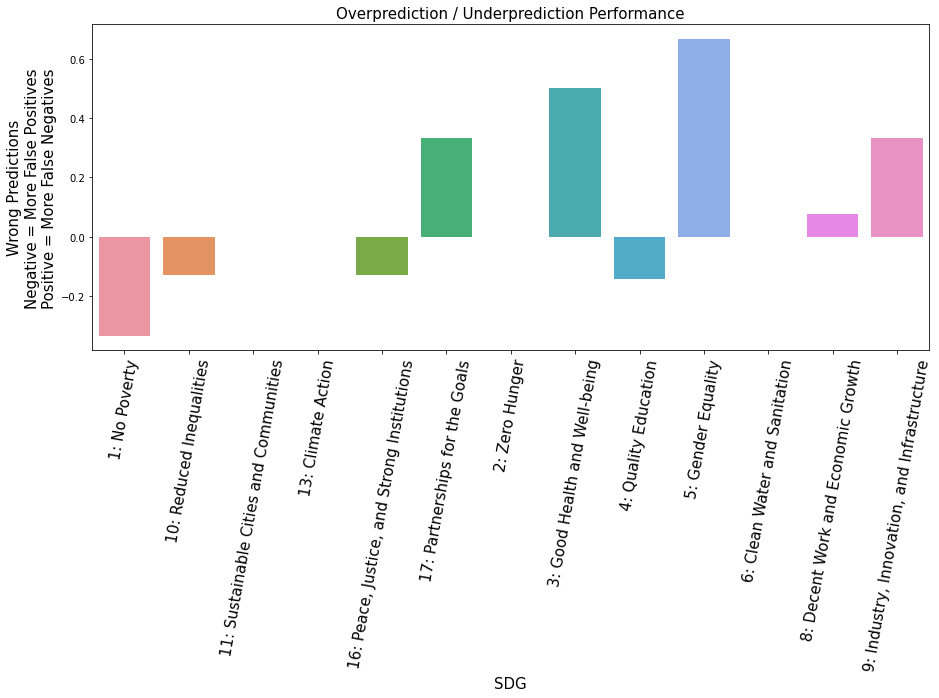

In [58]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=80, fontsize = 15)
plt.title('Overprediction / Underprediction Performance', fontsize = 15)
plt.ylabel('Wrong Predictions\nNegative = More False Positives\nPositive = More False Negatives', fontsize = 15)
plt.xlabel('SDG', fontsize = 15)
sns.barplot([SDG_dict[int(i)] for i in list(mlb.classes_)], true_predicted_diff_norm)
print("Aggregate difference between true and predicted labels. Score of 0 indicates that there are either no wrong predictions or the false positives and false negatives cancel out.")

In [59]:
# plot confusion matrix 
def plot_confusion_matrix(cm_normalized, i):
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    title = "SDG "+ SDG_dict[int(mlb.classes_[i])]+ "\nNumber of Occurences = %i" % y_true[:,i].sum(axis=0)
    plt.title(title, fontsize=17)
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

Confusion matrix:
 [[60  3]
 [ 1  5]]


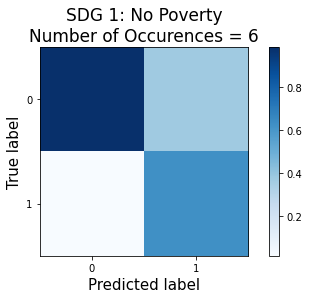

Confusion matrix:
 [[10 13]
 [ 7 39]]


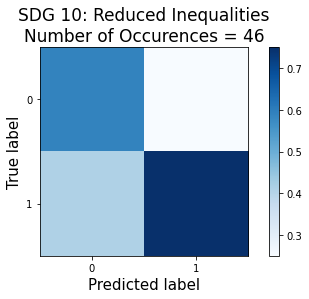

Confusion matrix:
 [[69]]


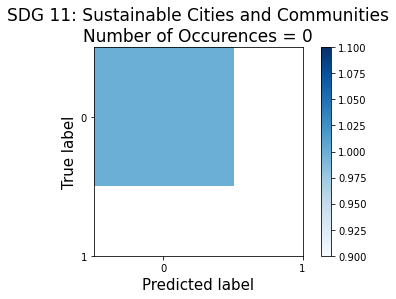

Confusion matrix:
 [[69]]


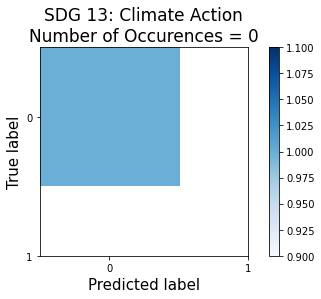

Confusion matrix:
 [[25 13]
 [ 9 22]]


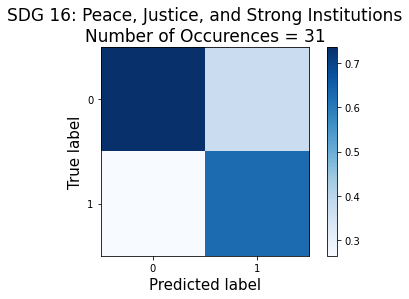

Confusion matrix:
 [[65  1]
 [ 2  1]]


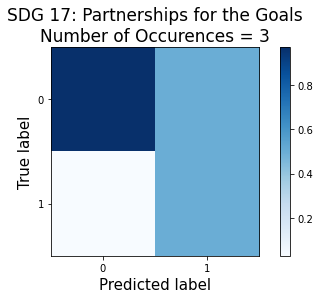

Confusion matrix:
 [[69]]


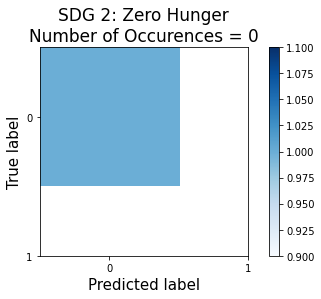

Confusion matrix:
 [[64  1]
 [ 3  1]]


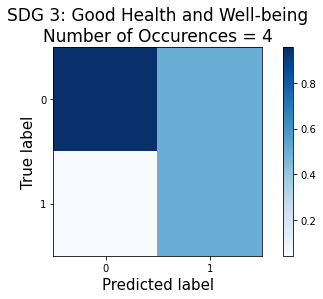

Confusion matrix:
 [[60  2]
 [ 1  6]]


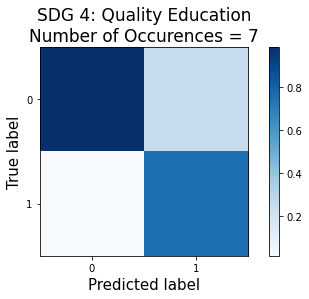

Confusion matrix:
 [[63  0]
 [ 4  2]]


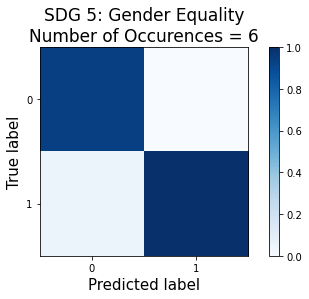

Confusion matrix:
 [[68  0]
 [ 0  1]]


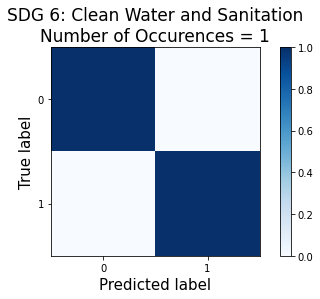

Confusion matrix:
 [[51  5]
 [ 6  7]]


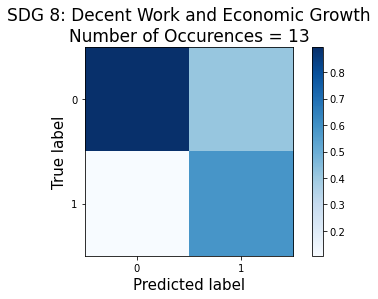

Confusion matrix:
 [[65  1]
 [ 2  1]]


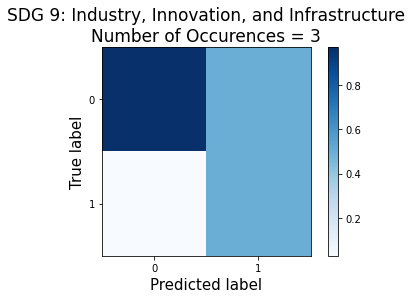

In [60]:
for ind, val in enumerate(mlb.classes_):
    cm = confusion_matrix(y_true[:,ind], y_pred[:,ind])
    cm_normalized = cm.astype('float') / cm.sum(axis=0)
    print("Confusion matrix:\n", cm)
    plot_confusion_matrix(cm_normalized, ind)